# EXTRA TREE CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\abhi\AppData\Local\Temp\ipykernel_2816\2793088780.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('Data.csv')
df.head()

,Category,Age,Gender,ALB_Level,ALP_Level,ALT_Level,AST_Level,Liver_Fibrosis_Score,Bilirubin_Level,CHOL,CREA,Alcohol_Consumption,Diabetes
0,Normal,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Normal,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Normal,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Normal,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Normal,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df=df.dropna()
df=df.drop_duplicates()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Category','Gender']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [5]:
df.columns

Index(['Category', 'Age', 'Gender', 'ALB_Level', 'ALP_Level', 'ALT_Level',
       'AST_Level', 'Liver_Fibrosis_Score', 'Bilirubin_Level', 'CHOL', 'CREA',
       'Alcohol_Consumption', 'Diabetes'],
      dtype='object')

In [6]:
x1 = df.drop(labels='Category', axis=1)
y1 = df.loc[:,'Category']

In [7]:
# import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({4: 526, 0: 24, 3: 20, 2: 12, 1: 7})
OVER SAMPLING DATA COUNT  :  Counter({4: 526, 1: 526, 3: 526, 2: 526, 0: 526})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2104
NUMBER OF TEST DATASET      :  526
TOTAL NUMBER OF DATASET    :  2630


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2104
NUMBER OF TEST DATASET      :  526
TOTAL NUMBER OF DATASET    :  2630


In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
RFC = ExtraTreesClassifier()
RFC.fit(x_train,y_train)

ExtraTreesClassifier()

In [12]:
predicted = RFC.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00       105

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:


 [[105   0   0   0   0]
 [  0 105   0   0   0]
 [  0   0 105   0   0]
 [  0   0   0 106   0]
 [  0   0   0   0 105]]


In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [100.         100.         100.         100.          99.80988593]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS : 100.0


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS : 0.0


THE CONFUSION MATRIX SCORE OFEXTRA TREE CLASSIFIER:


[[105   0   0   0   0]
 [  0 105   0   0   0]
 [  0   0 105   0   0]
 [  0   0   0 106   0]
 [  0   0   0   0 105]]


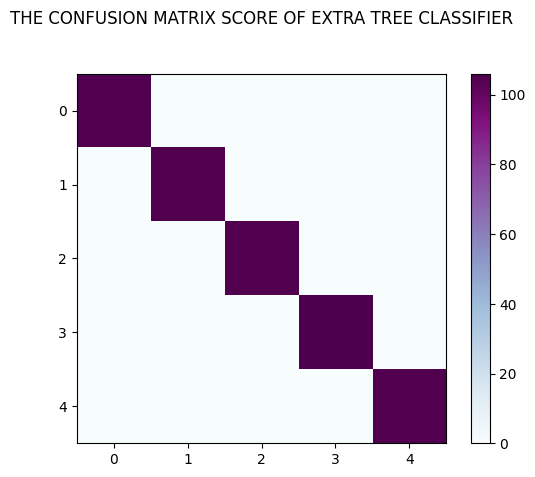

In [18]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER\n\n', cmap=plt.cm.BuPu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OFEXTRA TREE CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

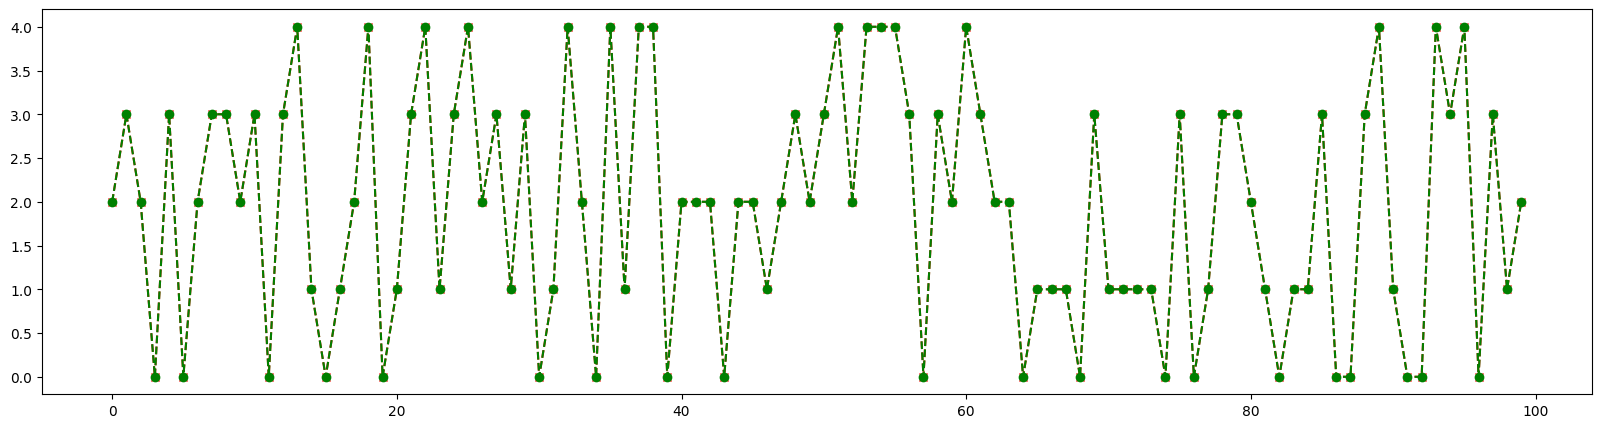

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()